# CIFAR-10

### Import libraries

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import initializers, regularizers
from keras.models import load_model, Model


/home/shomeb/k/katrinhh/anaconda3/envs/tdt4195/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/shomeb/k/katrinhh/anaconda3/envs/tdt4195/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 21s 0us/step


### Sanity check



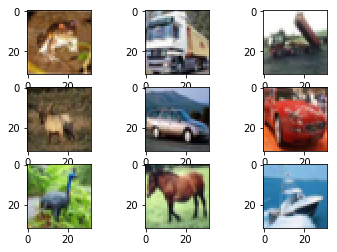

In [3]:
for i in range(3):
    for j in range(3):
        idx = i*3 + j + 1
        plt.subplot(3,3,idx)
        plt.imshow(X_train[idx-1])

### Basic Data Statistics

In [4]:
num_of_classes = np.unique(y_train).shape[0]
print("Number of training examples: ", X_train.shape[0])
print("Number of testing examples: ", X_test.shape[0])
print("Shape of input images: ", X_train.shape[1:])
print("Data type: ", X_train.dtype)
print("Number of classes: ", num_of_classes)

Number of training examples:  50000
Number of testing examples:  10000
Shape of input images:  (32, 32, 3)
Data type:  uint8
Number of classes:  10


### Pixel wise standardization

In [5]:
pixel_mean = X_train.mean(axis=0)
pixel_std = X_train.std(axis=0) + 1e-10 #prevents division by zero-error
# piwel-wise normalization on the train and test set
X_train = (X_train - pixel_mean) / pixel_std
X_test = (X_test - pixel_mean) / pixel_std


### To_categorical



In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Change data shape

In [7]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

### Split data

In [8]:
seed = 7
np.random.seed(seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

print("Training set shape: ", X_train.shape)
print("Validation set shape: ", X_val.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (40000, 32, 32, 3)
Validation set shape:  (10000, 32, 32, 3)
Testing set shape:  (10000, 32, 32, 3)


#### Perform some data augmentation
Gjør mer av dette etterpå kanskje

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


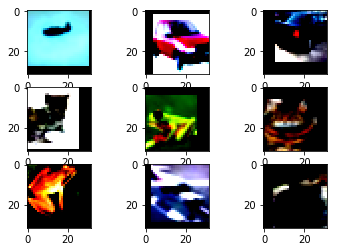

In [9]:
datagen = ImageDataGenerator(fill_mode='constant',
                             width_shift_range=0.2,
                            height_shift_range=0.2,
                             cval=0,
                            )

datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32,3))
    plt.show()
    break

## Load Mnist Model

In [10]:
mnist_model = load_model('my_model.h5')
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

#### Compile model

In [11]:
adam = keras.optimizers.Adam(lr=0.0001, epsilon=1e-8)

model.compile(optimizer=adam,
             loss="categorical_crossentropy",
             metrics=['accuracy'],
             )


model.layers[2].set_weights(mnist_model.layers[2].get_weights())
print(mnist_model.layers[2].get_weights())

model.summary()

[array([[-0.16641776, -0.2702754 , -0.28274545, ..., -0.26664916,
         0.24675612,  0.05113506],
       [ 0.25749844, -0.18655798, -0.11284086, ..., -0.31700915,
         0.22981259,  0.06238803],
       [ 0.2803112 ,  0.07872794,  0.14512594, ..., -0.1039006 ,
         0.27355283, -0.18534142],
       ...,
       [ 0.08083223, -0.22602999,  0.13224724, ...,  0.04029442,
        -0.11945938,  0.16630524],
       [-0.09126677,  0.00711793, -0.33787757, ..., -0.05594772,
         0.14353886,  0.13380773],
       [-0.21067019, -0.09799551, -0.04937935, ..., -0.06095538,
        -0.31119633,  0.14561853]], dtype=float32), array([-0.00171656, -0.0332822 , -0.01233585, -0.0160028 ,  0.01266978,
       -0.02649306, -0.03637408, -0.04885193,  0.11429232,  0.00238606],
      dtype=float32)]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_____

#### Train the model on images with slight augmentation

In [12]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                   steps_per_epoch=len(X_train)/64,
                   epochs=20,
                   validation_data=(X_val, y_val),
                   verbose=1)


Epoch 1/20
625/625 [==============================] - 9s 14ms/step - loss: 2.1158 - acc: 0.2766 - val_loss: 1.9553 - val_acc: 0.3444
Epoch 2/20
625/625 [==============================] - 9s 14ms/step - loss: 1.9230 - acc: 0.3266 - val_loss: 1.9070 - val_acc: 0.3672
Epoch 3/20
625/625 [==============================] - 8s 13ms/step - loss: 1.8565 - acc: 0.3502 - val_loss: 1.8373 - val_acc: 0.3823
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 1.8256 - acc: 0.3603 - val_loss: 1.8092 - val_acc: 0.3889
Epoch 5/20
625/625 [==============================] - 8s 13ms/step - loss: 1.7988 - acc: 0.3664 - val_loss: 1.7949 - val_acc: 0.3974
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 1.7686 - acc: 0.3786 - val_loss: 1.7704 - val_acc: 0.4069
Epoch 7/20
625/625 [==============================] - 8s 13ms/step - loss: 1.7478 - acc: 0.3864 - val_loss: 1.7804 - val_acc: 0.4142
Epoch 8/20
625/625 [==============================] - 8s 13ms/step - 

### Visualize and analyse

fit_generator tracks both loss and accuracy on training and validation set

#### Loss

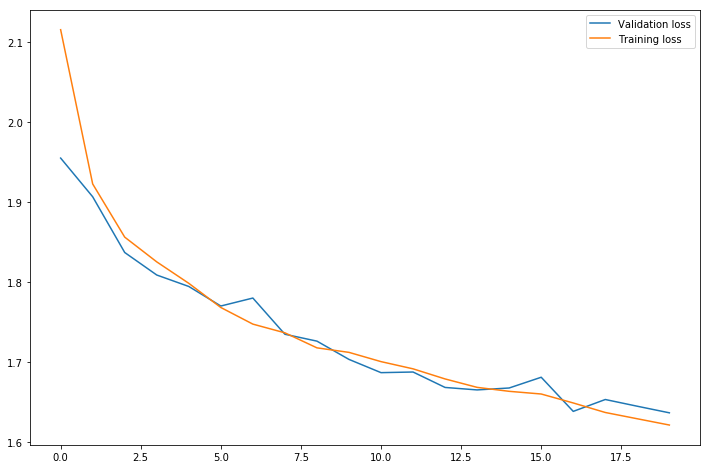

In [14]:
history = model.history.history
plt.figure(figsize=(12, 8))
plt.plot(history["val_loss"], label="Validation loss")
plt.plot(history["loss"], label="Training loss")
plt.legend()

#### Accuracy

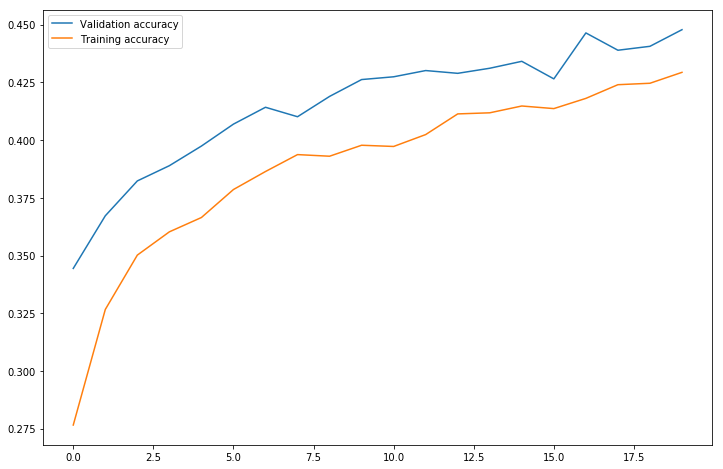

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(history["val_acc"], label="Validation accuracy")
plt.plot(history["acc"], label="Training accuracy")

plt.legend()

### Evaluation on test set

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss: ", test_loss)
print("Test acc: ", test_acc)

10000/10000 [==============================] - 1s 58us/step
Test loss:  1.6233047508239746
Test acc:  0.4508


#### Compare to previous plot

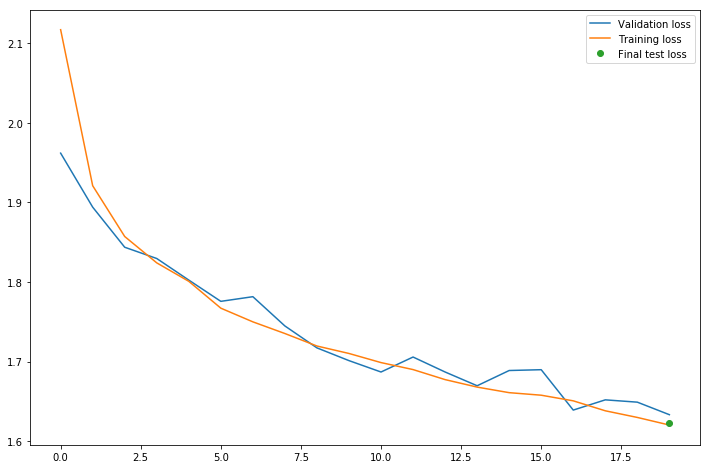

In [16]:
history = model.history.history
plt.figure(figsize=(12, 8))
plt.plot(history["val_loss"], label="Validation loss")
plt.plot(history["loss"], label="Training loss")
plt.plot([19], [test_loss], 'o', label="Final test loss")
plt.legend()